In [3]:
#inputs

input_data = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


In [5]:
# Assumptions
uf=0.8 # utilisation factor (%)
elec_price=32 #energy sell price ($/MWh)

In [9]:
# calculations 

investment_cost = input_data['Investment Cost']['value']*input_data['Capacity']['value']*1000  #1000 is required to convert MW to kW
print(f"Investment cost:\t{investment_cost}")

peroid_of_one_year= 24*365
production_power = input_data['Capacity']['value'] * uf * peroid_of_one_year
print(f"Production:\t{production_power}")

production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001 #0.001 is required due to $/Mbtu and Btu/kWh
print(f"Production Cost:\t{production_cost}")

revenue = production_power * elec_price 

print(f"Revenue:\t{revenue}")



Investment cost:	510500000
Production:	3504000.0
Production Cost:	41255220.0
Revenue:	112128000.0


In [10]:
# Create a DataFrame
import pandas as pd 
df = pd.DataFrame(columns=["Year", "Investment", "Production", "Production Cost", "Revenue", "Net Cash Flow"])

# Fill the DataFrame
for year in range(input_data['Expected plant life']['value'] + 1):
    if year == 0:
        df.loc[year] = [year, investment_cost, 0, 0, 0, -investment_cost]
    else:
        df.loc[year] = [year, 0, production_power, production_cost, revenue, revenue - production_cost]

In [12]:
df.head()

,Year,Investment,Production,Production Cost,Revenue,Net Cash Flow
0,0.0,510500000.0,0.0,0.0,0.0,-510500000.0
1,1.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
2,2.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
3,3.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
4,4.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0


In [17]:
import numpy_financial as npf

# Convert the "Net Cash Flow" column to a list
cash_flows = df["Net Cash Flow"].tolist()

# Calculate the IRR
irr = npf.irr(cash_flows)

# Convert IRR to percentage
irr_percent = irr * 100

print(f"The Internal Rate of Return (IRR) is: {irr_percent}%")


The Internal Rate of Return (IRR) is: 13.578504268341728%


### Make it unified 

In [17]:
#inputs

input_data = {
    "Investment Cost": {"value": 533, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 6927, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 3, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


# Assumptions
uf=0.8 # utilisation factor (%)
elec_price=32 #energy sell price ($/MWh)


# calculations 

investment_cost = input_data['Investment Cost']['value']*input_data['Capacity']['value']*1000  #1000 is required to convert MW to kW
print(f"Investment cost:\t{investment_cost}")

peroid_of_one_year= 24*365
production_power = input_data['Capacity']['value'] * uf * peroid_of_one_year
print(f"Production:\t{production_power}")

production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001 #0.001 is required due to $/Mbtu and Btu/kWh
print(f"Production Cost:\t{production_cost}")

revenue = production_power * elec_price 

print(f"Revenue:\t{revenue}")



# Create a DataFrame
import pandas as pd 
df = pd.DataFrame(columns=["Year", "Investment", "Production", "Production Cost", "Revenue", "Net Cash Flow"])

# Fill the DataFrame
for year in range(input_data['Expected plant life']['value'] + 1):
    if year == 0:
        df.loc[year] = [year, investment_cost, 0, 0, 0, -investment_cost]
    else:
        df.loc[year] = [year, 0, production_power, production_cost, revenue, revenue - production_cost]


import numpy_financial as npf

# Convert the "Net Cash Flow" column to a list
cash_flows = df["Net Cash Flow"].tolist()

# Calculate the IRR
irr = npf.irr(cash_flows)

# Convert IRR to percentage
irr_percent = irr * 100

print(f"The Internal Rate of Return (IRR) is: {irr_percent}%")


Investment cost:	266500000
Production:	3504000.0
Production Cost:	72816624.0
Revenue:	112128000.0
The Internal Rate of Return (IRR) is: 14.496881490455316%


### Sensitivity analysis 

In [13]:
elec_prices

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

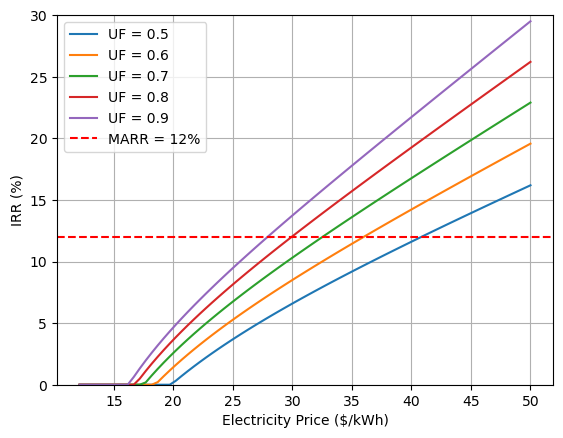

In [18]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the input data
input_data = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


# Define the range of electricity prices and utilization factors
elec_prices = np.linspace(0, 50, 100)  # replace with your range of electricity prices
ufs = [0.5, 0.6,0.7, 0.8, 0.9]  # replace with your range of utilization factors

# Calculate the period of one year
period_of_one_year = 24 * 365

# Create a DataFrame to store the results
df = pd.DataFrame(columns=["elec_price", "uf", "IRR"])

# Calculate the IRR for each combination of electricity price and utilization factor
for elec_price in elec_prices:
    for uf in ufs:
        # Calculate the investment cost
        investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000  # 1000 is required to convert MW to kW

        # Calculate the production power
        production_power = input_data['Capacity']['value'] * uf * period_of_one_year

        # Calculate the production cost
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001  # 0.001 is required due to $/Mbtu and Btu/kWh

        # Calculate the revenue
        revenue = production_power * elec_price

        # Create a list of net cash flows
        cash_flows = [-investment_cost] + [revenue - production_cost] * (input_data['Expected plant life']['value'] -1 )

        # Calculate the IRR
        irr = npf.irr(cash_flows)

        if irr<0:
            irr=0

        # Convert IRR to percentage
        irr_percent = irr * 100

        # Add the results to the DataFrame
        # df = df.append({"elec_price": elec_price, "uf": uf, "IRR": irr_percent}, ignore_index=True)

        # Add the results to the DataFrame
        df_to_append = pd.DataFrame([{"elec_price": elec_price, "uf": uf, "IRR": irr_percent}], columns=["elec_price", "uf", "IRR"])
        df = pd.concat([df, df_to_append], ignore_index=True)

# Plot the IRR for each utilization factor
for uf in ufs:
    df_uf = df[df["uf"] == uf]
    plt.plot(df_uf["elec_price"], df_uf["IRR"], label=f"UF = {uf}")

# Set the y-axis limit
plt.ylim(0, 30)
# plt.xlim(0, 50)

# Add a grid
plt.grid(True)

# Add a horizontal line for the MARR
plt.axhline(y=12, color='r', linestyle='--', label="MARR = 12%")

plt.xlabel("Electricity Price ($/kWh)")
plt.ylabel("IRR (%)")
plt.legend()
plt.show()


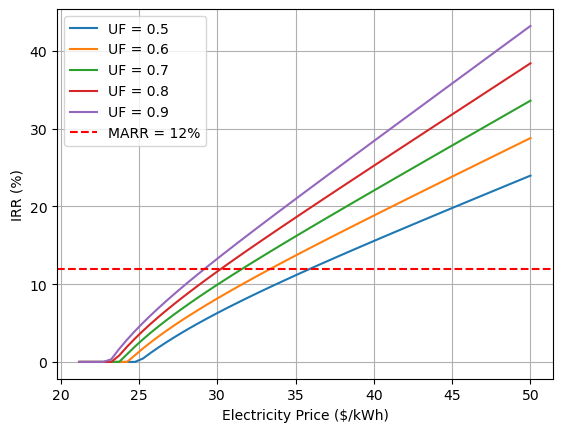

In [21]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def calculate_and_plot(input_data, elec_prices, ufs,MARR):
    # Calculate the period of one year
    period_of_one_year = 24 * 365

    # Create a DataFrame to store the results
    df = pd.DataFrame(columns=["elec_price", "uf", "IRR"])

    # Calculate the IRR for each combination of electricity price and utilization factor
    for elec_price in elec_prices:
        for uf in ufs:
            # Calculate the investment cost
            investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000  # 1000 is required to convert MW to kW

            # Calculate the production power
            production_power = input_data['Capacity']['value'] * uf * period_of_one_year

            # Calculate the production cost
            production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001  # 0.001 is required due to $/Mbtu and Btu/kWh

            # Calculate the revenue
            revenue = production_power * elec_price

            # Create a list of net cash flows
            cash_flows = [-investment_cost] + [revenue - production_cost] * (input_data['Expected plant life']['value'] - 1)

            # Calculate the IRR
            irr = npf.irr(cash_flows)

            # If the IRR is negative, set it to 0
            if irr < 0:
                irr = 0

            # Convert IRR to percentage
            irr_percent = irr * 100

            # Add the results to the DataFrame
            df_to_append = pd.DataFrame([{"elec_price": elec_price, "uf": uf, "IRR": irr_percent}], columns=["elec_price", "uf", "IRR"])
            df = pd.concat([df, df_to_append], ignore_index=True)

    # Plot the IRR for each utilization factor
    for uf in ufs:
        df_uf = df[df["uf"] == uf]
        plt.plot(df_uf["elec_price"], df_uf["IRR"], label=f"UF = {uf}")

    # Set the y-axis limit
    #plt.ylim(0, 30)

    # Add a grid
    plt.grid(True)

    # Add a horizontal line for the MARR
    plt.axhline(y=MARR, color='r', linestyle='--', label="MARR = 12%")

    plt.xlabel("Electricity Price ($/kWh)")
    plt.ylabel("IRR (%)")
    plt.legend()
    plt.show()

# Define the input data
input_data = {
    "Investment Cost": {"value": 533, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 6927, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 3, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


# Define the range of electricity prices and utilization factors
elec_prices = np.linspace(0, 50, 100)  # replace with your range of electricity prices
ufs = [0.5, 0.6, 0.7, 0.8, 0.9]  # replace with your range of utilization factors
MARR=12
# Call the function
calculate_and_plot(input_data, elec_prices, ufs, MARR)


#### incremental net cash flow

#### mutually exclusive investment alternatives

In [37]:
import numpy_financial as npf
import pandas as pd

def calculate_incremental_cash_flow(input_data1, input_data2, elec_price, uf):
    # Calculate the period of one year
    period_of_one_year = 24 * 365

    # Create a DataFrame to store the results
    df = pd.DataFrame(columns=["Year", "Plant1 Investment", "Plant2 Investment", "Plant1 Production Cost", "Plant2 Production Cost", "Incremental Net Cash Flow"])

    for year in range(input_data1['Expected plant life']['value'] + 1):
        # Calculate the investment cost for each plant
        if year == 0:
            investment_cost1 = input_data1['Investment Cost']['value'] * input_data1['Capacity']['value'] * 1000
            investment_cost2 = input_data2['Investment Cost']['value'] * input_data2['Capacity']['value'] * 1000
        else:
            investment_cost1 = 0
            investment_cost2 = 0

        # Calculate the production power for each plant
        production_power1 = input_data1['Capacity']['value'] * uf * period_of_one_year
        production_power2 = input_data2['Capacity']['value'] * uf * period_of_one_year

        # Calculate the production cost for each plant
        production_cost1 = production_power1 * input_data1['Heat rate at rated output']['value'] * input_data1['Expected fuel cost']['value'] * 0.001
        production_cost2 = production_power2 * input_data2['Heat rate at rated output']['value'] * input_data2['Expected fuel cost']['value'] * 0.001

        if year == 0:
            production_cost1 = 0
            production_cost2 = 0

        # revenue
        revenue1 = production_power1 * elec_price 
        revenue2 = production_power1 * elec_price 

        # Calculate the incremental net cash flow
        incremental_net_cash_flow = (investment_cost1 - investment_cost2) + (production_cost1 - production_cost2) +(revenue1-revenue2)

        # Add the results to the DataFrame
        df_to_append = pd.DataFrame([{"Year": year, "Plant1 Investment": investment_cost1, "Plant2 Investment": investment_cost2, "Plant1 Production Cost": production_cost1, "Plant2 Production Cost": production_cost2, "Incremental Net Cash Flow": incremental_net_cash_flow}], columns=["Year", "Plant1 Investment", "Plant2 Investment", "Plant1 Production Cost", "Plant2 Production Cost", "Incremental Net Cash Flow"])
        df = pd.concat([df, df_to_append], ignore_index=True)

    # Calculate the IRR for the incremental net cash flow
    irr = npf.irr(df["Incremental Net Cash Flow"].tolist())
    if irr < 0:
        irr = 0
    irr_percent = irr * 100

    print(f"The IRR for the incremental net cash flow is: {irr_percent}%")

    return df,irr_percent


In [38]:
input_data_CCGT = {
    "Investment Cost": {"value": 533, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 6927, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 3, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}

#inputs

input_data_coal = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}

uf= 0.8 


df_,Irr_=calculate_incremental_cash_flow(input_data_CCGT, input_data_coal, elec_price, uf)

The IRR for the incremental net cash flow is: 12.563615712403763%


In [30]:
Irr_

12.563615712403763

In [34]:
df_irr

,uf,IRR
0,0.500000,7.031772
1,0.666667,10.193092
2,0.833333,13.142256
3,1.000000,15.979409


The IRR for the incremental net cash flow is: 0%
The IRR for the incremental net cash flow is: 6.358103059561504%
The IRR for the incremental net cash flow is: 11.390987886941705%
The IRR for the incremental net cash flow is: 15.979408819698504%


C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1524445628.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

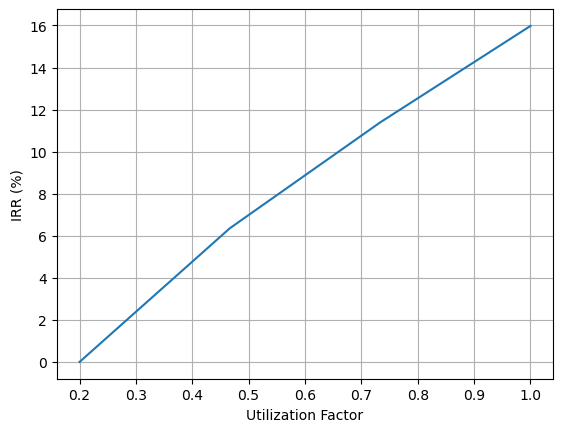

In [36]:
import matplotlib.pyplot as plt

# Define the range of utilization factors
ufs = np.linspace(0.2, 1.0, 4)  # replace with your range of utilization factors

# Create a DataFrame to store the results
df_irr = pd.DataFrame(columns=["uf", "IRR"])

# Calculate the IRR for each utilization factor
for uf in ufs:
    df, irr = calculate_incremental_cash_flow(input_data_CCGT, input_data_coal, elec_price, uf)
    df_irr = df_irr.append({"uf": uf, "IRR": irr}, ignore_index=True)

# Plot the IRR for each utilization factor
plt.plot(df_irr["uf"], df_irr["IRR"])
plt.xlabel("Utilization Factor")
plt.ylabel("IRR (%)")
plt.grid(True)
plt.show()
